<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2014-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Daniel Rojo Mata
### Rodrigo Vega Vilchis
---

<h1 align="center">Programación para la física computacional</h1> 

## Práctica 3.  Programación para la física computacional


### Gráficas y errores numéricos
---

## EJERCICIOS:

### 1. Gráfica de datos experimentales

El archivo `manchasolares.txt`, contiene el número observado de manchas solares en el Sol en cada mes desde enero de 1749. El archivo contiene dos columnas de números, la primera es el mes y la segunda el número de manchas solares.

**(a)** Escribe un programa que lea los datos y haga una gráfica de las manchas solares en función del tiempo.

In [8]:
import numpy as np

import matplotlib.pyplot as plt

In [9]:
datos=np.loadtxt("manchasolares.txt",float)

tiempo=[]
manchas=[]
for i in range(len(datos)):
    tiempo.append(datos[i][0])
    manchas.append(datos[i][1])
tiempo=np.asarray(tiempo)
manchas=np.asarray(manchas)

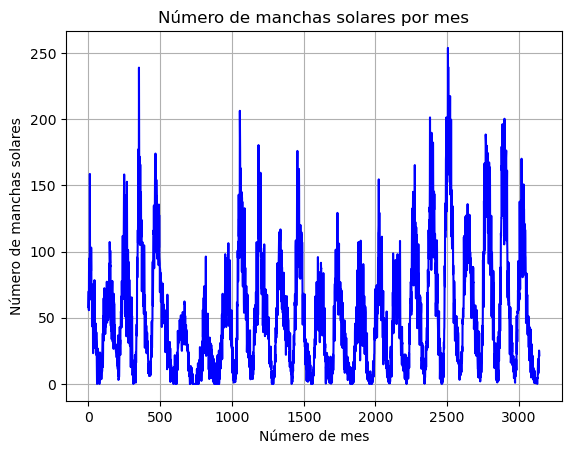

In [10]:
plt.plot(tiempo, manchas,color='blue')
plt.xlabel("Número de mes")
plt.ylabel("Número de manchas solares")
plt.title("Número de manchas solares por mes")
plt.grid(True)

**(b)** Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la gráfica.

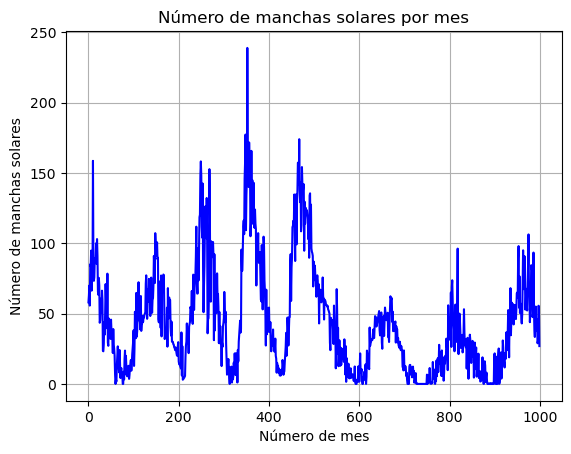

In [17]:
### Hacemos los primeros 1000 datos
T=tiempo[0:1000]
M=manchas[0:1000]
plt.plot(T, M,color='blue')
plt.xlabel("Número de mes")
plt.ylabel("Número de manchas solares")
plt.title("Número de manchas solares por mes")
plt.grid(True)
plt.show()

**c)** Modifica nuevamente tu programa para calcular y graficar la media (promedio) móvil de los datos, definida por:

<h3 align="center">$Y_k = {1\over2r} \sum_{m=-r}^r y_{k+m}$</h3> 

donde $r = 5$ (en este caso) y $y_k$ son los números de manchas solares.

El programa debe graficar tanto los datos originales como la media móvil en el mismo gráfico, sólo sobre los primeros 1000 datos.


In [54]:
### Calucalamos la media movil.
r=5
## en esta lista iran los valores de la media movil
yk=[]
## Hcaemos una lista xk en ka cual delitaremo los valores de tiempo
## ya que la media movil toma cinco valores hacia atras y cinco hacia adelante
## tenemos que hacer esta nueva lista de tiempo 5 valores desplazado del inicio y del final si 
## estariamos indexando indices negativos en la lista de manchas
xk=T[r:len(M)-r]
for i in range(r,len(M)-r):
    S=0
    ## Aqui hacemos el intervalo +-5
    for j in range(-r,r+1):
        ## vamos sumando los numeros de manchas
        S+=M[i+j]
    yk.append((1/(2*r))*S)

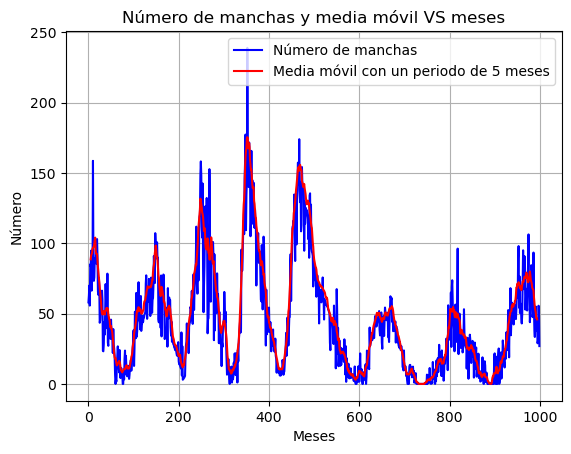

In [55]:
plt.plot(T,M,color='blue',label="Número de manchas")
plt.plot(xk,yk,color='red',label="Media móvil con un periodo de 5 meses")
plt.ylabel("Número")
plt.xlabel("Meses")
plt.title("Número de manchas y media móvil VS meses")
plt.legend(loc="upper right")
plt.grid(True)

### 2. Gráfica de curvas

Aunque la función `plot` está diseñada principalmente para hacer gráficos $xy$ estándar, se puede adaptar para otros tipos de gráficas también.

**a)** Grafica la llamada curva _deltoide_, definida paramétricamente por las ecuaciones:

<h4 align="center">$x = 2 cos θ + cos 2θ, \; \; \; \; \; \; y = 2 sin θ − sin 2θ$</h4> 

donde $0\le\theta<2\pi$. Toma un conjunto de valores para $\theta$ entre $0$ y $2\pi$ y calcula $x(\theta)$ e $y(\theta)$ usando las ecuaciones anteriores, para posteriormente graficar $y$ como función de $x$.



In [8]:
angulo=np.linspace(0,2*np.pi,1000)
x=2*np.cos(angulo)+np.cos(2*angulo)
y=2*np.sin(angulo)-np.sin(2*angulo)

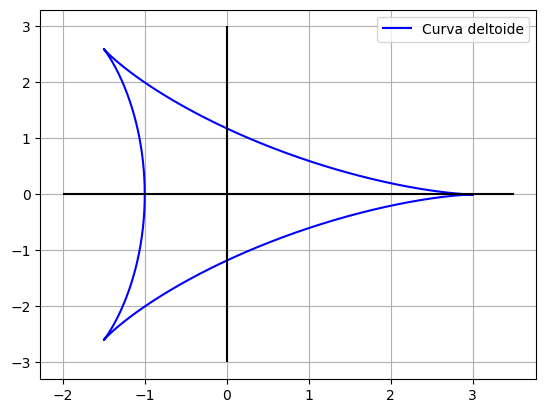

In [9]:
plt.plot(x,y,color='blue',label="Curva deltoide")
plt.vlines(x=0,ymin=-3,ymax=3,color='black')
plt.hlines(y=0,xmin=-2,xmax=3.5,color='black')
plt.grid(True)
plt.legend(loc="upper right")

**b)** Usando este mismo enfoque, se puede hacer una gráfica polar $r=f(\theta)$ para alguna función $f$ calculando $r$ para un rango de valores de $\theta$ y luego convirtiendo $r$ y $\theta$ a coordenadas cartesianas usando las ecuaciones estándar:

<h4 align="center">$x = r\cos\theta, \; \; \; \; y = r\sin\theta $</h4> 

Utiliza este método para trazar la espiral Galileana: $r = \theta^2$ para $0\le\theta\le10\pi$.

In [10]:
theta=np.linspace(0,10*np.pi,1000)
xr=theta**2*np.cos(theta)
yr=theta**2*np.sin(theta)

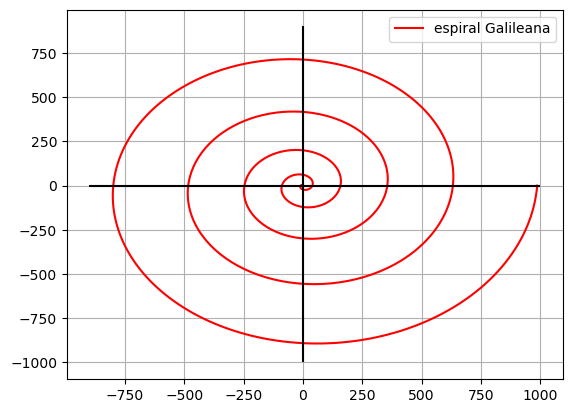

In [11]:
plt.plot(xr,yr,color="red",label="espiral Galileana")
plt.legend(loc="upper right")
plt.vlines(x=0,ymin=-1000,ymax=900,color='black')
plt.hlines(y=0,xmin=-900,xmax=1000,color='black')
plt.grid(True)

**c)** Con el mismo método, haz una gráfica polar de la "función de Fey'':

<h4 align="center">$r = e^{\cos\theta} - 2 \cos 4\theta + \sin^5 \frac{\theta}{12}$</h4> 

en el rango $0\le\theta\le24\pi$.

In [12]:
thetaf=np.linspace(00,24*np.pi,10000)
xf=(np.exp(np.cos(thetaf))-(2*np.cos(4*thetaf))+(np.sin(thetaf/12))**5)*np.cos(thetaf)
yf=(np.exp(np.cos(thetaf))-(2*np.cos(4*thetaf))+(np.sin(thetaf/12))**5)*np.sin(thetaf)

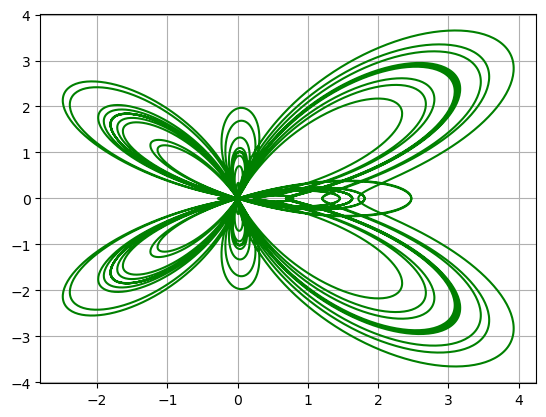

In [13]:
plt.plot(xf,yf,color="green")
plt.grid(True)

### 3. La gráfica de Feigenbaum (caos determinista)

En un especial _halloween_ de los Simpsons, Homero viaja al pasado a la era jurásica y por un pequeño descuido cambia el curso de toda la historia en el futuro. Lo anterior es una referencia al cuento _A Sound of Thunder_ de 1952 del escritor de ciencia ficción Ray Bradbury en donde lo que se destruye en el pasado es una mariposa.

Esta idea fue retomada y popularizada por el físico Edward Lorenz en 1972 cuando dio una conferencia en la Asociación Estadounidense para el Avance de la Ciencia (_American Association for the Advancement of Science_) titulada "¿El aleteo de una mariposa en Brasil puede provocar un tornado en Texas?". Dando paso al concepto del _efecto mariposa_, del cual probablemente hayas oído hablar y que es el ejemplo clásico de _caos determinista_ en sistemas climáticos.

El caos determinista también aparece en muchos sistemas físicos más complejos, incluyendo especialmente la dinámica de fluidos. Debido a su naturaleza aparentemente aleatoria, el comportamiento de los sistemas caóticos es difícil de predecir y se ve fuertemente afectado por pequeñas perturbaciones en las condiciones iniciales. Uno de los ejemplos más famosos del fenómeno del caos determinista es sin duda el _mapeo logístico_, que es un sistema matemático muy simple, definido por la ecuación:

<h3 align="center">$x_{n+1} = rx_n(1-x_n)$</h3>
$\;$

Para un valor dado de la constante $r$, se toma un valor de $x_n$ (digamos $\frac{1}{2}$) y se introduce en el lado derecho de esta ecuación y regresa un valor de $x_{n+1}$. Luego se toma ese valor y se vuelve a introducir en el lado derecho, lo que da otro valor, y así sucesivamente. Esto es un _mapeo iterativo_. Se continua haciendo la misma operación una y otra vez sobre su valor de $x_n$, y entonces sucede una de las tres siguiente situaciones: 


1. El valor se establece en un número fijo y permanece allí. Esto se llama _punto fijo_. Por ejemplo, $x_n=0$ es siempre un punto fijo del mapeo logístico. (Si se pone $x_n=0$ en el lado derecho se obtiene $x_{n+1}=0$ en el lado izquierdo).


2. No se establece en un solo valor, sino que se establece en un patrón periódico, rotando alrededor de un conjunto de valores, digamos cuatro valores, repitiéndose en secuencia una y otra vez. Esto se llama **_orbita_ (en este _caso de periodo 4_)** o _ciclo límite_.


3. Todo enloquece. El mapeo, genera una secuencia **aparentemente aleatoria** de números que parecen no tener ni patrón ni razón (_ni ton ni son_). Esto es el **_caos determinista_**. "Caos" porque realmente parece caótico y "determinista" porque aunque los valores parecen aleatorios, **no lo son**. Son a todas luces, totalmente predecibles, porque se obtienen mediante una simple ecuación y el comportamiento está **determinado**, aunque no lo parezca.

**Responde a las siguientes preguntas:**

**a)** Apoyate en el programa que vimos en clase y escribe un programa que muestre el comportamiento del mapeo logı́stico mediante una gráfica.

In [4]:
### Definimos la ecuacion logistica
def log(r,x):
    return r*x*(1-x)

In [46]:
### establecemos N el numero de iteraciones, X0 nuestro punto inicial y r la lista de constantes r que ocuparemos
N=1000
x0=0.5
r=np.arange(1,4,0.01)
### en la lista x_n guardaremos los valores de x_n de las itereaciones logisticas. 
x_n=[]
### Ya que para cada valor de r puede haber uno o mas valores x_n por la bifurcacion, haceos una lista de valores de r que se repitan}
### de acuerdo a sis correspondientes x_n, por ejemplo si hay dos valores de x_n asociados a un r, entonces este r lo agregamos a la lista
### del eje dos veces para tener dos listas grficables del mismo tamaño
eje_r=[]
### Para cada valor de r
for i in r:
    ## repetimos 1000 veces la iteracion del mapeo logistico
    for j in range(N):
        x=log(i,x0)
        x0 = x
        ### vamos a hacer una lista de los ultimos 300 datos
        if j>N-300:
            ## en esta lista se agregan los valores para x_n
            x_n.append(x)
            ## y como para varios valores de x_n puede corresponder un mismo r, entonces hacemos otra lista para el eje que tenga 
            ## el mismo tamaño
            eje_r.append(i)
        else:
            continue

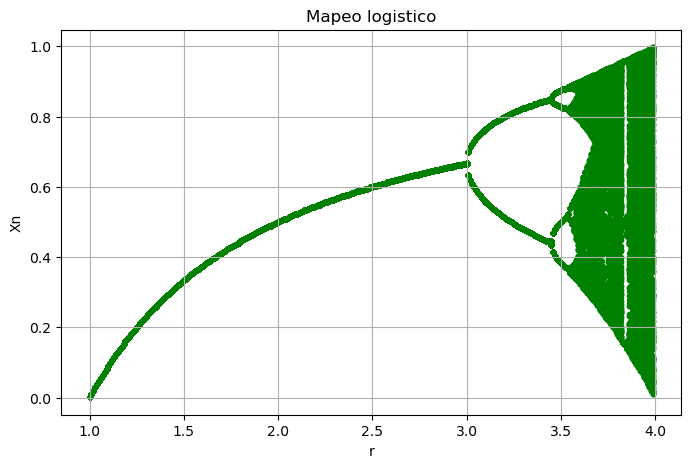

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(eje_r,x_n,color='green',marker='.')
plt.xlabel("r")
plt.ylabel("Xn")
plt.title("Mapeo logistico")
plt.grid(True)
plt.show()

**b)** De acuerdo a tu gráfica, ¿a qué valor de $r$ el sistema pasa de un comportamiento ordenado (puntos fijos u orbitas) a un comportamiento caótico? A este punto a veces se le llama "el borde del caos".

#respuesta: 
Para valores de $x_0$ mayores a $\frac{1}{2}$ numpy llega a su límite y tiene un "overflow" por lo que tomando un $x_0=.5$ y oscilando r entre 1 y 4 vemos que el sistema tiene un punto fijo hasta r=3 y una vez ahi se empieza a bifurcar en orbitas de periodo 2, 4, etc por lo que para un $r>3$ podríamos decir que ya tenemos un comportamiento caótico

**Hint:** Esto es lo que debes hacer para hacer tu programa:

Para un valor dado de $r$, comienza con $x_0=\frac{1}{2}$ e itera la ecuación del mapeo logístico mil veces. Eso le dará la oportunidad de establecerse en un punto fijo o en una orbita de algún periodo. Luego ejecuta otras mil iteraciones y grafica los puntos $(r,x_{\infty})$ en una gráfica donde el eje horizontal es $r$ y el eje vertical es $x_{\infty}$. Puedes usar la función `plot` con las opciones `"ko"` o `"k."` para dibujar una gráfica con puntos, uno para cada punto, o puedes usar la función `scatter` para dibujar un diagrama de dispersión (que siempre usa puntos). Repite todo el cálculo para valores de $r$ de 1 a 4 en pasos de 0.01, graficando los puntos para todos los valores de $r$ en la misma figura. Tu programa debería generar la distintiva gráfica que parece un árbol inclinado hacia un lado. Esta famosa imagen se llama _Gráfica de Feigenbaum_<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1), en honor a su descubridor Mitchell Feigenbaum.

**c) Opcional (para 1.5 puntos extra):**
Hay otra forma para calcular el diagrama de Feigenbaum, que puede ser más claro y rápido, dado que hace uso de la capacidad de Python para realizar aritmética con arreglos completos.

Crea un arreglo `r` que contenga cada valor distinto de $r$, `[1.0, 1.01, 1.02, ... ]`. Después, crea otro arreglo `x` del mismo tamaño para guardar los valores correspondientes de $x$, establecidos inicialmente en $0.5$; finalmente realiza una iteración del mapeo logístico para todos los valores de $r$ a la vez, con una sola instrucción de la forma `x = r*x*(1-x)` y comparala con tu programa anterior<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2).

<a name="cite_note-1"></a>1. [^](#cite_ref-1) A veces también se suele llamar _gráfica de higuera_, debido al juego de palabras que surge del hecho de que parece un árbol y Feigenbaum significa "higuera" en alemán.

<a name="cite_note-2"></a>2. [^](#cite_ref-2) Debido a la velocidad con la que Python puede realizar cálculos con arreglos, este método debería ser significativamente más rápido que el método más básico anterior.

### 4. El conjunto de Mandelbrot

El conjunto de Mandelbrot, llamado así por su descubridor, el matemático francés Benoit Mandelbrot, es un _fractal_; un objeto matemático infinitamente ramificado que contiene estructura dentro de estructura dentro de estructura, tan profundamente como queramos mirar. La definición del conjunto de Mandelbrot en términos de números complejos es la siguiente.

Consideremos la ecuación:
<h3 align="center">$z_{n+1} = z_n^2 + c, \;  \;  \;   \;  \;  \;   \;  \;  \;  z_n, c \in  \mathbb{C}$</h3>
$\;$

donde $z_n$ es un número complejo y $c$ es una constante compleja. De manera, muy similar al _mapeo logístico_, la definición del _conjunto de Mandelbrot_ implica la iteración repetida de esta ecuación para cualquier valor dado de $c$. La ecuación convierte un número de entrada $z_n$ en un número de salida $z_{n+1}$; de tal manera que se toma un valor inicial de $z_0$ y se introduce en la ecuación para obtener un nuevo valor $z_1$, luego tomamos ese valor y lo volvemos a introducir para obtener $z_2$ y así sucesivamente.

Así, el conjunto de Mandelbrot es el conjunto de puntos del plano complejo que satisface la siguiente definición:

_Para un valor dado de $c$ y la condición inicial $z_0=0$; si al iterar repetidamente la ecuación, la magnitud del valor resultante es mayor a dos (i.e. $z_{\infty} > 2$), entonces el punto del plano complejo para ese valor $c$ no está en el conjunto de Mandelbrot; de lo contrario, si está en el conjunto._



Para utilizar esta definición, en principio, habría que iterar infinitas veces para demostrar que un punto está en el conjunto de Mandelbrot, ya que un punto está en el conjunto sólo si la iteración nunca pasa de $z_n=2$. Sin embargo, en la práctica, simplemente se realiza una gran cantidad de iteraciones (digamos 100) y si $z_n$ no ha excedido 2 en ese momento, entonces lo consideramos suficientemente bueno.

**a)** Escribe un programa para crear una imagen del conjunto de Mandelbrot.
Realiza la iteración para todos los valores de $c=x+iy$ en una cuadrícula de $N \times N$ que abarque la región donde $-2\le x\le 2$ y $-2\le y\le 2$. Haz una gráfica de densidad (`density plot`) en el que los puntos de la cuadrícula dentro del conjunto de Mandelbrot estén coloreados en negro y los de afuera estén coloreados en blanco.

In [9]:
### al ser numeros complejos primero tenemos que vectorizar estas coordenadas con una fruncion mesh la cual nos hace una mariz
import numpy as np
import matplotlib.pyplot as plt
N=1000
x=np.linspace(-2,2,N)
y=np.linspace(-2,2,N)

In [7]:
def mandelbrot(c,n):
    z0=0
    for i in range(n+1):
        z=(z0**2)+c
        z0=0
    if abs(z) <= 2:
        return z

In [31]:
## Para poder usar imshow y hacer un density plot necesitamos hacer una cuadricula
## de la cual cada punto que tenga la condicion de mandelbrot se coloreara de negro
# Damos la N para la cuadricula y hacemos la cuadricula 

N = 5000
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
X,Y = np.meshgrid(x,y)

#para hacer la cuadricula los valores x los dejamos igual ya que son el eje real, pero los valores y los tenemos que volver vector columna
#y hacerlo imaginarios
# en la funcion tomamos hacemos un arreglo en el que cada elemento tiene una coordeanda x y una cordeanda y imaginaria
def cuadricula(x,y):
    return x[np.newaxis,:] + y[:,np.newaxis] * 1j

cuadri = cuadricula(x,y)
 

def mandelbrot(c,n):
    z = 0 
    for i in range(n+1):
        z = z**2 + c
    return abs(z) <= 2

z = mandelbrot(cuadri,100)

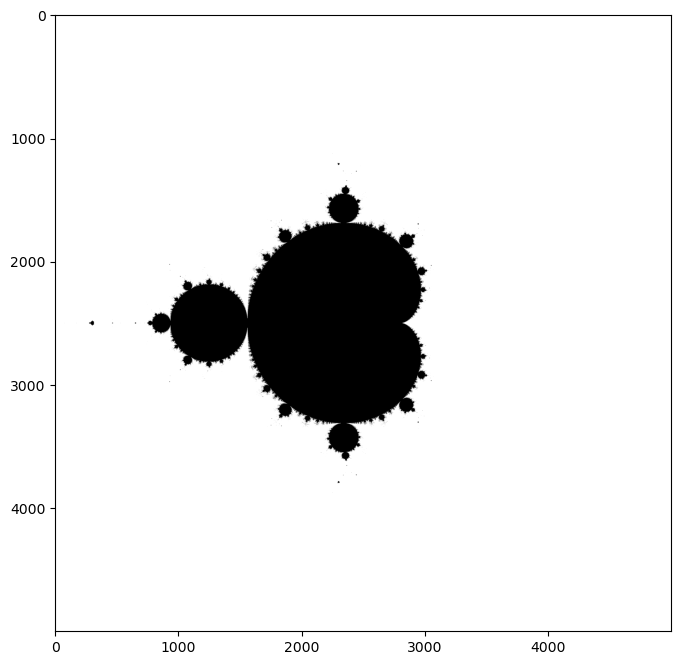

In [32]:
plt.figure(figsize=(8,8))
plt.imshow(zz,cmap='binary')

**_Sugerencia_**: Probablemente te resulte útil comenzar con una cuadrícula muy simple, es decir, con un valor pequeño de $N$ (quizás $N=100$) para que tu programa se ejecute rápidamente mientras lo pruebas. Una vez que te asegures de que funciona correctamente, aumenta el valor de $N$ para producir una imagen final de alta calidad de la forma del conjunto.

#### b) Opcional (para 1.5 puntos extra):
Si te aburrió lo anterior (o te resultó demasiado fácil), puedes programar otra variante del mismo ejercicio que puede producir imágenes sorprendentes. En lugar de colorear los puntos solo en blanco o negro, colorea los puntos de acuerdo con el número de iteraciones de la ecuación antes de que $z_n$ sea mayor que 2 (o bien el número máximo de iteraciones si es que $z_n$ nunca llega a ser mayor que 2). Si usas alguno de los esquemas más coloridos que Python proporciona para las gráficas de densidad, como `"hot"` o `"jet"`, puedes crear algunas imágenes muy espectaculares. Otra variante interesante es colorear según el logaritmo del número de iteraciones, lo que ayuda a revelar parte de la estructura más fina fuera del conjunto.

### 5. Factorial (valores flotantes)
 
Durante el curso, hemos escrito un par de programas para calcular e imprimir el factorial de un número ingresado por el usuario, usando valores _enteros_ y no de _punto flotante_.  Usa alguno de esos programas para calcular el factorial de 200 y modificalo para **usar variables de _punto flotante_** y calcula nuevamente el factorial de 200.

**Qué es lo que encuentras?, explica.**

In [61]:
### programa para factorial
def factorial_int(n):
    n=int(n)
    nf=1
    for i in range(1,n+1):
        nf=i*nf
    return nf
factorial_int(1000)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

In [64]:
def factorial_float(n):
    nf=float(1)
    for i in range(1,n+1):
        nf=float(i*nf)
    return nf


factorial_float(1000)

inf

# Explicación
Como las computadoras dedicaan una cierta cantidad de bits a los números, a un número entero le puede dedicar una gran cantidad de bits, por lo que puede mostar muchisimo elementos del número, sin embargo en un número float, se destinan mas bits a la parte flotante que al entero, por lo que si tenemos una parte entera muy grande, no habrá suficientes bts para mostrarlo y el programa en este caso nos dirá que es Inf, o sea muy grande.

### 6. Ecuaciones cuadráticas

Considera una ecuación cuadrática $ax^2+bx+c=0$ que tiene soluciones reales.

**a)** Escribe un programa que tome como entrada tres números, $a$, $b$ y $c$, e imprima las dos soluciones de la ecuación cuadrática $ax^2+bx+c=0$; usando la fórmula estándar:

<h4 align="center">$x_{1,2} = {-b \pm \sqrt{b^2-4ac}\over2a}$</h4>
$\;$

Utiliza tu programa para calcular las soluciones de $0.001 x^2 + 1000 x + 0.001 = 0$.


In [69]:
a=float(input("Escribe el valor del coeficiente a:"))
b=float(input("Escribe el valor del coeficiente b:"))
c=float(input("Escribe el valor del coeficiente c:"))

x1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

print("Las soluciones de la ecuación son:")
print("x1=",x1)
print("x2=",x2)

Escribe el valor del coeficiente a: 0.001
Escribe el valor del coeficiente b: 1000
Escribe el valor del coeficiente c: 0.001


Las soluciones de la ecuación son:
x1= -9.999894245993346e-07
x2= -999999.999999


**b)** Existe otra forma de escribir las soluciones de una ecuación cuadrática.  Demuestra que multiplicando la parte superior e inferior de la solución anterior por $-b\pm \sqrt{b^2-4ac}$, las soluciones también se pueden escribir como:

<h4 align="center">$x_{1,2} = {2c\over-b\pm \sqrt{b^2-4ac}}$</h4>
$\;$

**Dem.**

Las soluciones a la ecuación son: $x_{1,2} = \dfrac{-b \pm \sqrt{b^2-4ac}}{2a}$, multiplicando por $ \dfrac{-b \mp \sqrt{b^2-4ac}}{-b \mp \sqrt{b^2-4ac}}$ del lado derecho tenemos que:

$$ x_{1,2}= \left(\dfrac{-b \pm \sqrt{b^2-4ac}}{2a}\right) \left( \dfrac{-b \mp \sqrt{b^2-4ac}}{-b \mp \sqrt{b^2-4ac}}\right) = \dfrac{b^2 \pm b\sqrt{b^2-4ac} \mp b\sqrt{b^2-4ac} - (b^2 -4ac)}{2a(-b \mp \sqrt{b^2-4ac})}$$
$$ = \dfrac{4ac}{2a(-b \mp \sqrt{b^2-4ac})} = \dfrac{2c}{-b \mp \sqrt{b^2-4ac}}$$
$$ \therefore x_{1,2}=\dfrac{2c}{-b \mp \sqrt{b^2-4ac}}$$

Agrega unas lineas a tu programa para imprimir también estos valores, además de los anteriores y entonces usa nuevamente el programa para resolver $\; 0.001 x^2 + 1000 x + 0.001= 0$.
**¿Qué es lo que ves? ¿Cómo lo explicas?**.

In [71]:
a=float(input("Escribe el valor del coeficiente a:"))
b=float(input("Escribe el valor del coeficiente b:"))
c=float(input("Escribe el valor del coeficiente c:"))
### metodo a
xa1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
xa2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

### metodo b
xb1 = (2*c)/(-b-np.sqrt(b**2-4*a*c))
xb2 = (2*c)/(-b+np.sqrt(b**2-4*a*c))

print("Las soluciones de la ecuación por el metodo a son:")
print("x1=",xa1)
print("x2=",xa2)
print("Las soluciones de la ecuación por el método b son:")
print("x1=",xb1)
print("x2=",xb2)


Escribe el valor del coeficiente a: 0.001
Escribe el valor del coeficiente b: 1000
Escribe el valor del coeficiente c: 0.001


Las soluciones de la ecuación por el metodo a son:
x1= -9.999894245993346e-07
x2= -999999.999999
Las soluciones de la ecuación por el método b son:
x1= -1.000000000001e-06
x2= -1000010.5755125057


**c)** Usando lo que has aprendido, escribe un nuevo programa que calcule con precisión ambas raíces de la ecuación cuadrática en todos los casos.

In [72]:
### PODEMOS HACER UNA MEDIA ARITMETICA ENTRE AMBAS SOLUCIONES
### PARA PODER OBTENER UNA SOLUCION MAS PRECISA
a=float(input("Escribe el valor del coeficiente a:"))
b=float(input("Escribe el valor del coeficiente b:"))
c=float(input("Escribe el valor del coeficiente c:"))
### metodo a
xa1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
xa2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

### metodo b
xb1 = (2*c)/(-b-np.sqrt(b**2-4*a*c))
xb2 = (2*c)/(-b+np.sqrt(b**2-4*a*c))

### PROMEDIO
xp1=(xa1+xb1)/2
xp2=(xa2+xb2)/2

print("Las soluciones de la ecuación por el metodo a son:")
print("x1=",xa1)
print("x2=",xa2)
print("Las soluciones de la ecuación por el método b son:")
print("x1=",xb1)
print("x2=",xb2)
print("El promedio de las soluciones es:")
print("x1=",xp1)
print("x2=",xp2)



Escribe el valor del coeficiente a: 0.001
Escribe el valor del coeficiente b: 1000
Escribe el valor del coeficiente c: 0.001


Las soluciones de la ecuación por el metodo a son:
x1= -9.999894245993346e-07
x2= -999999.999999
Las soluciones de la ecuación por el método b son:
x1= -1.000000000001e-06
x2= -1000010.5755125057
El promedio de las soluciones es:
x1= -9.999947123001673e-07
x2= -1000005.2877557529


Este es un buen ejemplo de cómo las computadoras no siempre funcionan como se espera. Si simplemente se aplica la fórmula estándar para la ecuación cuadrática, la computadora a veces obtendrá una respuesta incorrecta. En la práctica, el método que has desarrollado aquí es la forma correcta de resolver una ecuación cuadrática en una computadora, aunque es más complicado que la fórmula estándar. Si estuvieras escribiendo un programa que implicara resolver muchas ecuaciones cuadráticas, este método pod ría ser un buen candidato para convertirlo en una función: podrías poner los detalles del método dentro de dicha función para ahorrarte la molestia de seguirlo paso a paso, cada vez que tengas una nueva ecuación que resolver.



### 7. Cálculo de derivadas

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x_0$. Esto lo podemos hacer con lápiz y papel si conocemos la forma matemática de la función, o podemos hacerlo en la computadora haciendo uso de la definición de la derivada:

<h3 align="center">${df \over dx} = \lim_{\delta x \to 0} {f(x_0+\delta)-f(x_0)\over \delta x}$</h3>
$\;$

En la computadora no podemos tomar el límite cuando $\delta x$ llega a cero, pero podemos obtener una aproximación razonable simplemente haciendo que $\delta x $ sea pequeño.

**a)** Escribe un programa que defina una función `f(x)` y que devuelva el valor $x(x-1)$, luego calcula la derivada de la función en el punto $x_0=1$ usando la fórmula anterior con  $\delta x =10^{-2}$. Calcula analíticamente el valor real de la misma derivada y compáralo con la respuesta que da tu programa. Ambos no estarán perfectamente de acuerdo.

**¿Por qué no?**


In [75]:
def funcion(x):
    return x*(x-1)
    
def derivada(f,x0,dx):
    return (f(x0+dx)-f(x0))/dx

In [76]:
der=derivada(funcion,1,1e-2)
print(der)

1.010000000000001


Analiticamente el valor de la derivada es 1, sin embargo este error se debe a que obtuvimos una pendiente con una aproxcimación dx, por lo que el resultado difiere en la magnitud del error.

**b)** Repite el cálculo para $\delta x =10^{-4}$, $10^{-6}$, $10^{-8}$, $10^{-10}$, $10^{-12}$ y $10^{-14}$. Deberías ver que la precisión del cálculo inicialmente mejora a medida que $\delta x $ se hace más pequeña, pero luego vuelve a empeorar.

**¿Por qué pasa esto?**



In [78]:
Dx=[1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]
for i in Dx:
    print(derivada(funcion,1,i))

1.0000999999998899
1.0000009999177333
1.0000000039225287
1.000000082840371
1.0000889005833413
0.9992007221626509


Estudiaremos las derivadas numéricas con más detalle más adelante en el curso, donde examinaremos¸ técnicas para abordar estos problemas y maximizar la precisión de nuestros cálculos.